In [1]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
import numpy as np

import matplotlib.pyplot as plt

# Price Elasticity Models with GLMs

## Introduction

## Optimizing with Constant Price Elasticity

If revenue (R) if the product of quantity (Q) and price (P), and Q is a function of P, then maximizing R becomes an optimization problem:

1. $R = QP$

Taking the derivative of R in terms of P and setting equal to zero yields the ratio between the percent change in P and the percent change in Q, referred to as the price elasticity of demand ($\epsilon$). 

2. $\frac{dR}{dP} = Q  \frac{dP}{dP} + P  \frac{dQ}{dP} = Q + P  \frac{dQ}{dP} = 0$

3. $\frac{dR}{dP} = Q(1+ \frac{P}{Q}  \frac{dQ}{dP}) = 0$

4. $\frac{dQ}{Q}  \frac{P}{dP} = -1 = \epsilon$

By the above optimization, R is maximized when $\epsilon = -1$. It is worth noting the inverse relationship between $\frac{dQ}{Q} $ and $\frac{dP}{P} $, which is typical for normal goods: goods that sell in greater quantities when the price is lower. Thus, $\epsilon$ typically takes a negative value.

From (4), to make a statement about elasticity, one can observe that when $\epsilon$ is treated as constant, the $\%\Delta Q$ is proportional to the $\%\Delta P$. 

It is common to solve equation (3) to obtain a regression formulation, then fit the regression on observed data to measure the average price elasticity of an item over that data. 

5. $\int{\frac{dQ}{Q}} = \epsilon\int{\frac{dP}{P}}$

6. $\log{Q} = \epsilon\log{ P}+c$

7. $Q = P^{\epsilon}e^{c}$

Note that $\epsilon$ is being treated as a constant, and equations (4) through (6) arise from the assumption that $\epsilon$ is constant, and that R is maximized. Linear equation (5) can be optimized with regression over data describing Q and P, and $\epsilon$ is conveniently the coefficient of the regression. Measuring the average elasticity of a good is helpful for knowing if the good is relatively elastic or inelastic. Measuring average $\epsilon$ is not particularly helpful for setting P such that R is maximized.

8. $R = QP =  P^{\epsilon}e^{c}P = P^{\epsilon+1}e^{c}$

9. $\frac{dR}{dP} = (\epsilon+1)P^{\epsilon}e^{c} = \epsilon P^{\epsilon}e^{c} + P^{\epsilon}e^{c} = 0$

10. $\epsilon P^{\epsilon}e^{c} = -P^{\epsilon} e^{c} $

11. $\epsilon = -1$

P is eliminated and the condition that $\epsilon=-1$ is the only optimality condition for R. 

Proposed here is a technique for choosing a demand curve ($Q(P)$) by modeling $\epsilon$ as a function of P and/or Q, and using the resulting demand curves to optimize R.

It is not reasonable in practice to assume that $\epsilon$ is constant: that the ratio between the percent change in Q and the percent change in P is constant for all P. The assuption of constant $\epsilon$ implies an exploding of Q as P becomes very small. Indeed one can observe from equation (6), with the context that $\epsilon$ takes a negative value for normal goods, that the limit of Q as P approaches 0 is infinite.

12. Given linear condition: $\lim_{P -> 0+ | \epsilon < 0} P^{\epsilon}e^{c} = \inf$

It is important for practical applications of price elasticity modeling that Q not trend towards infinity.

## Optimizing with Non-Constant Price Elasticity

Rather than modeling elasticity at optimality, elasticity needs to be modeled away from optimality to describe how elasticity changes as conditions change, such as the price. Rather than using optimality as the basic for deriving demand curve models, let's use a generalized condition for $\frac{dR}{dP}$:

13. $ \frac{dR}{dP} = Q(1+ \frac{P}{Q}  \frac{dQ}{dP}) = \alpha$

14. $ \epsilon = \frac{P}{Q}  \frac{dQ}{dP} = \frac{\alpha}{Q} - 1$

By describing how $\epsilon$ changes as $\frac{dR}{dP} = \alpha$ changes, consideration is made for the condition that $\epsilon$ and P may not be optimal, and changes in $\epsilon$ can be modeled. 

### Elasticity Proportional to Price

It can be convenient to model $\epsilon$ as being proportional to P, thus as P approaches 0, $\epsilon$ approaches 0. Consequently, as the percent change in P increases drastically as P approaches 0, the percent change in Q is controlled by shrinking $\epsilon$, and Q does not approach infinite.

15. $ \epsilon = \frac{dQ}{Q}  \frac{P}{dP} = P * B$

To make a claim about elasticity by this model for $\epsilon$, one can observe in (15) that the $ \%\Delta Q $ is proportional to the nominal $\Delta P$. Advantagously, equation (15), when solved, yields Q as a function of P that does optimize R through the setting of P.

16. $\int{\frac{dQ}{Q}} = \int{\frac{P  B dP}{P}} = \int{B dP}$

17. $\log{Q} = BP+c$

18. $Q = e^{BP+c}$

Note that (16) can be written as $ \frac{dQ}{dP} = B  Q $, the derivative of Q in terms of P being proportional to Q, a similar condition to the assumption of the Poisson Distribution that the variance of the distribution is proportional to the mean. While linear equation (17) can be regressed over data to estimate B and c, equation (18) can also be regressed over data using Poisson Regression. 

#### Comparing optimizations of the Log-Linear model, and Poisson Regressor

It should be examined if regressing equation (17) and (18) yield like estimates for B and c. In optimizing cost functions to discover estimates of parameters B and c, equations (17) and (18) do not share the same basis of a cost function. In fact, equation (17), when solved using the sum-of-squared-errors cost function, has an analytical solution, while equation (18) does not, requiring an iterative solution. When using the sum-of-squared-errors cost function to optimize either equation (17) (analytically or iteratively) or equation (18) (iteratively), equation (17) will be optimized for cost on the $\log{Q}$ dimension, while equation (18) will be optimized over the Q dimension. With Q being the true target of regression, it is recommended to leverage equation (18) and Poisson Regression.

#### Optimizing R by Setting P

When incorporated in a price-setting optimization problem, equation (18) can be used to maximize R.

19. $R = QP = e^{BP} e^{c} P $

20. $\frac{dR}{dP} = e^{BP} e^{c} + P B e^{BP} e^{c} = 0$

21. $ e^{BP} e^{c} = -P B e^{BP} e^{c} $

22. $ P = \frac{-1}{B} $

Note that optimal P by this model for $\epsilon$ is independent of intercept c.

### Elasticity Proportional to Inverse-Quantity

Alternatively, one might model that elasticity is proportional to the inverse of Q, such that as Q grows, elasticity approaches zero:

23. $ \epsilon =  \frac{dQ}{Q} \frac{P}{dP} = \epsilon = \frac{1}{Q} B$

Obtaining a demand curve $Q(P)$ with this $\epsilon$ model is:

24. $   \int{\frac{dQ Q}{Q}} = \int{\frac{B dP}{P}} $

25. $   Q = B \log{P} + c = \log{P^B} + c $

Choosing P to optimize R then becomes:

26. $R = QP = (B \log{P} + c) P $

27. $\frac{dR}{dP} = (B \log{P} + c) + P \frac{B}{P} = 0$

28. $ \log{P} = \frac{-B - c}{B} = -1 - \frac{c}{B}$

29. $ P = e ^ { -1 - \frac{c}{B}} $

Note that optimal P by this model for $\epsilon$ is dependent on B and c.

### Elasticity Proportional to Price/Quantity

Here is a model for $\epsilon$ that yields a simple linear demand curve:

30. $ \epsilon =  \frac{dQ}{Q} \frac{P}{dP} = \epsilon = \frac{P}{Q} B$

To make a statement about elasticity, this model for $\epsilon$ assumes the nominal $\Delta Q$ is proportional to the nominal $\Delta P$. To obtain a demand curve $Q(P)$:

31. $\int{dQ} = \int{B dP}$

32. $Q = BP+c$

To optimize P for maximizing R:

33. $R = QP = (BP+c)P $

34. $\frac{dR}{dP} = (BP+c) + PB = 0$

35. $ 2PB = -c $

29. $ P = \frac{-c}{2B} $

Note that optimal P by this model for $\epsilon$ is dependent on B and c.



In [4]:
X,y = fetch_openml(data_id=43927,return_X_y=True,as_frame=True)

c:\Users\Jason\Desktop\git_control\ml-research\.venv\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,39993186.04,12508937.27,13315901.42,1761343.08,12407004.27,9967538.34,1887772.28,551693.65,conventional,2016.0,TotalUS,7.0,3.0
1,35567568.43,11457080.38,11677528.00,1266433.97,11166526.08,8984513.63,1727668.80,454343.65,conventional,2016.0,TotalUS,7.0,10.0
2,32656123.63,10320463.27,10628872.60,953631.47,10753156.29,8737861.29,1624816.27,390478.73,conventional,2016.0,TotalUS,7.0,17.0
3,32339377.09,10331314.28,10795751.15,947964.05,10264347.61,8315738.70,1561208.69,387400.22,conventional,2016.0,TotalUS,7.0,24.0
4,38010426.16,12623188.50,10988734.57,859889.81,13538613.28,10041243.95,3119708.27,377661.06,conventional,2017.0,TotalUS,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018.0,WestTexNewMexico,2.0,4.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018.0,WestTexNewMexico,1.0,28.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018.0,WestTexNewMexico,1.0,21.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018.0,WestTexNewMexico,1.0,14.0


In [10]:
mask = (X['region']=='WestTexNewMexico')&(X['type']=='organic')

In [12]:
X[mask]
y[mask]

5323     1.89
12027    1.81
12028    1.92
12029    1.80
12030    2.08
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 166, dtype: float64

In [18]:
allDat = pd.concat([X,y],axis=1)

In [19]:
for m in allDat['month'].unique():
    allDat[f'MONTH_{m}']=np.where(allDat['month']==m,1,0)

for year in allDat['year'].unique():
    allDat[f'YEAR_{m}']=np.where(allDat['year']==year,1,0)

In [20]:
allDat

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,MONTH_3.0,MONTH_2.0,MONTH_5.0,MONTH_9.0,MONTH_4.0,MONTH_1.0,MONTH_12.0,MONTH_11.0,MONTH_10.0,YEAR_10.0
0,39993186.04,12508937.27,13315901.42,1761343.08,12407004.27,9967538.34,1887772.28,551693.65,conventional,2016.0,...,0,0,0,0,0,0,0,0,0,0
1,35567568.43,11457080.38,11677528.00,1266433.97,11166526.08,8984513.63,1727668.80,454343.65,conventional,2016.0,...,0,0,0,0,0,0,0,0,0,0
2,32656123.63,10320463.27,10628872.60,953631.47,10753156.29,8737861.29,1624816.27,390478.73,conventional,2016.0,...,0,0,0,0,0,0,0,0,0,0
3,32339377.09,10331314.28,10795751.15,947964.05,10264347.61,8315738.70,1561208.69,387400.22,conventional,2016.0,...,0,0,0,0,0,0,0,0,0,0
4,38010426.16,12623188.50,10988734.57,859889.81,13538613.28,10041243.95,3119708.27,377661.06,conventional,2017.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018.0,...,0,1,0,0,0,0,0,0,0,0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018.0,...,0,0,0,0,0,1,0,0,0,0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018.0,...,0,0,0,0,0,1,0,0,0,0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018.0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
subset = allDat[mask].copy()
subset.sort_values(by=['year','month','day'],ascending=[True,True,True],inplace=True)

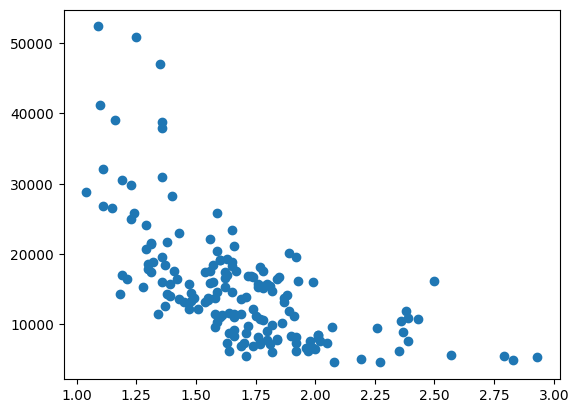

In [27]:
plt.scatter(subset['AveragePrice'],subset['Total Volume'])

In [29]:
subset.groupby(['month']).agg({
    'Total Volume':'mean'
})

,Total Volume
month,
1.0,12641.329444
2.0,17247.381250
3.0,17192.408824
4.0,22386.286923
5.0,25968.660000
6.0,18023.974000
7.0,16350.754286
8.0,12839.326923
9.0,9460.180833


In [54]:
feats = ['AveragePrice']+[i for i in subset.columns if ('MONTH_' in i)&(i!='MONTH_4')]
target='Total Volume'

In [55]:
target

'Total Volume'

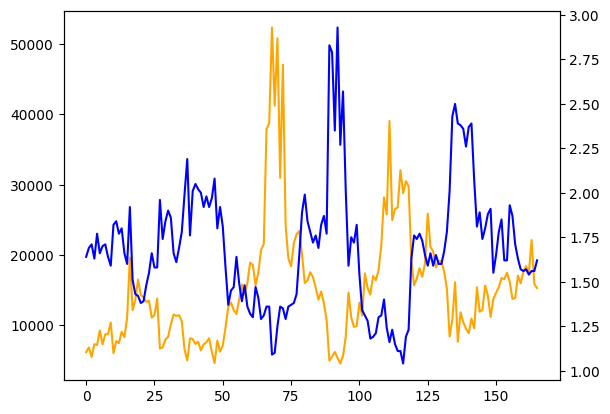

In [56]:

fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')


Text(0.5, 1.0, '0.6266689487499348')

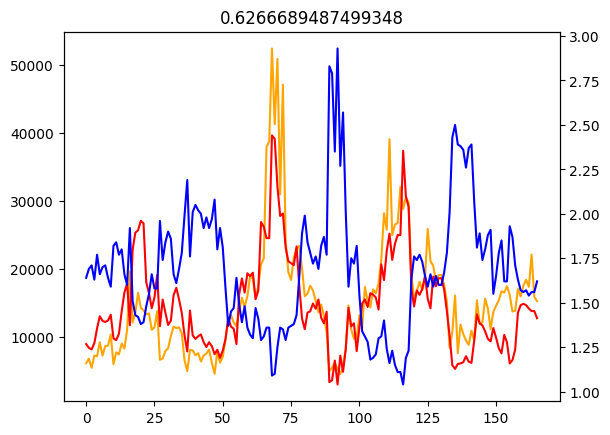

In [68]:
#Poisson elasticity model

X_train,X_test,y_train,y_test = train_test_split(subset[feats],subset[target],test_size=.1,shuffle=False)
pipe = Pipeline(steps=[
    #('MinMaxScaler',MinMaxScaler()),
    ('learner',PoissonRegressor(alpha=0,max_iter=1000))
]).fit(X_train,y_train)
y_pred = pd.Series(pipe.predict(X_test),index=X_test.index)
y_fit = pd.Series(pipe.predict(X_train),index=X_train.index)
all_pred = pd.concat([y_fit,y_pred],axis=0)


fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax1.plot(all_pred.values,color='red')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')
plt.title(
r2_score(subset[target],all_pred)
)


In [65]:
pipe['learner'].coef_

array([-1.31323638,  0.36985327,  0.17963362,  0.30545003,  0.01866377,
        0.09283361,  0.4532793 ,  0.28703491,  0.32889958, -0.30630047,
       -0.19306042,  0.09095009,  0.31228631])

In [66]:
## Tweedie model: compound gamma poisson

from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LinearRegression


Text(0.5, 1.0, '0.6120588969273522')

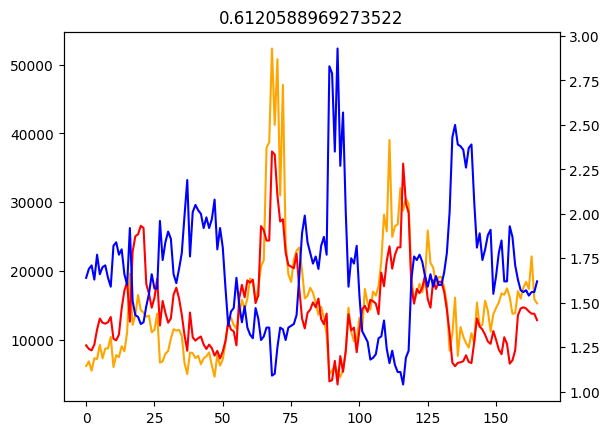

In [69]:
pipe = Pipeline(steps=[
    #('MinMaxScaler',MinMaxScaler()),
    ('learner',TweedieRegressor(alpha=0,link='log',power=1.5,max_iter=1000))
]).fit(X_train,y_train)
y_pred = pd.Series(pipe.predict(X_test),index=X_test.index)
y_fit = pd.Series(pipe.predict(X_train),index=X_train.index)
all_pred = pd.concat([y_fit,y_pred],axis=0)


fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax1.plot(all_pred.values,color='red')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')
plt.title(
r2_score(subset[target],all_pred)
)


Text(0.5, 1.0, '0.5925734350211047')

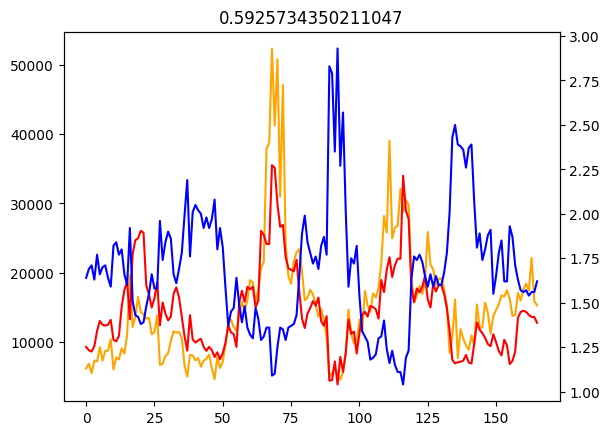

In [70]:
pipe = Pipeline(steps=[
    #('MinMaxScaler',MinMaxScaler()),
    ('learner',TweedieRegressor(alpha=0,link='log',power=2,max_iter=1000))
]).fit(X_train,y_train)
y_pred = pd.Series(pipe.predict(X_test),index=X_test.index)
y_fit = pd.Series(pipe.predict(X_train),index=X_train.index)
all_pred = pd.concat([y_fit,y_pred],axis=0)


fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax1.plot(all_pred.values,color='red')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')
plt.title(
r2_score(subset[target],all_pred)
)


Text(0.5, 1.0, '0.46921396761095246')

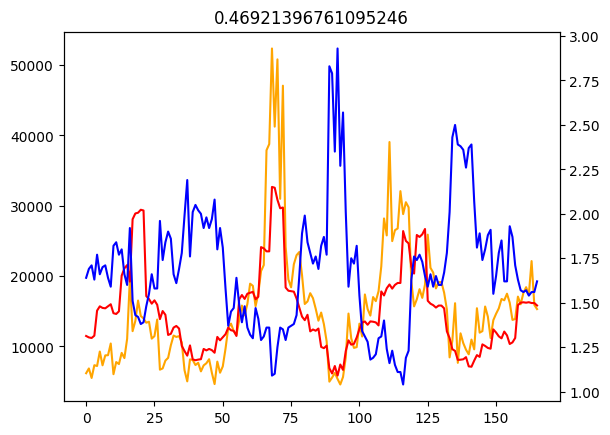

In [82]:
pipe = Pipeline(steps=[
    ('MinMaxScaler',MinMaxScaler()),
    ('learner',TweedieRegressor(alpha=0,link='log',power=2.5,max_iter=1000))
]).fit(X_train,y_train)
y_pred = pd.Series(pipe.predict(X_test),index=X_test.index)
y_fit = pd.Series(pipe.predict(X_train),index=X_train.index)
all_pred = pd.concat([y_fit,y_pred],axis=0)


fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax1.plot(all_pred.values,color='red')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')
plt.title(
r2_score(subset[target],all_pred)
)


Text(0.5, 1.0, '0.5137207623656859')

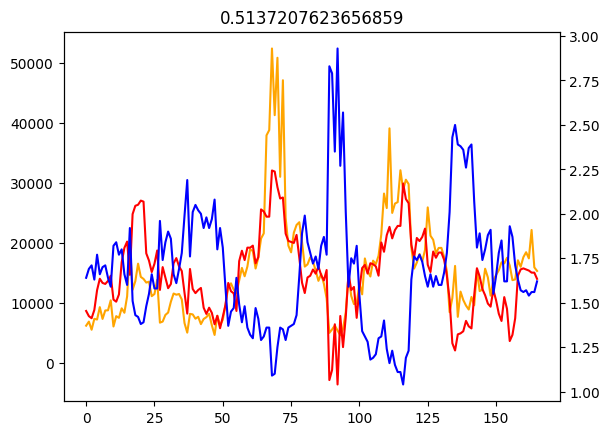

In [83]:
pipe = Pipeline(steps=[
    ('MinMaxScaler',MinMaxScaler()),
    ('learner',LinearRegression())
]).fit(X_train,y_train)
y_pred = pd.Series(pipe.predict(X_test),index=X_test.index)
y_fit = pd.Series(pipe.predict(X_train),index=X_train.index)
all_pred = pd.concat([y_fit,y_pred],axis=0)


fig,ax1=plt.subplots()
ax1.plot(subset['Total Volume'].values,color='orange')
ax1.plot(all_pred.values,color='red')
ax2=ax1.twinx()
ax2.plot(subset['AveragePrice'].values,color='b')
plt.title(
r2_score(subset[target],all_pred)
)
